<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# データの基本情報を表示
print("Column Names and Data Types:")
print(df.dtypes)

print("\nSummary Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))  # すべての列の統計情報を表示（カテゴリカルデータ含む）


Column Names and Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary Statistics:
          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean 

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
import pandas as pd

# データの欠損値を確認
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# 欠損値の割合を表示
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing Values in Dataset:")
print(missing_data[missing_data['Missing Values'] > 0])

# 欠損値の補完（カラムの削除は行わない）
df_filled = df.copy()  # 元のデータを保持

# カテゴリ変数は最頻値（mode）、数値変数は中央値（median）で補完
for col in df_filled.columns:
    if df_filled[col].dtype == 'object':  # カテゴリ変数
        df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)
    else:  # 数値変数
        df_filled[col].fillna(df_filled[col].median(), inplace=True)

# 欠損値処理後の確認
print("\nMissing Values After Imputation:")
print(df_filled.isnull().sum().sum())  # すべての欠損値が処理されたことを確認


Missing Values in Dataset:
                     Missing Values  Percentage
RemoteWork                    10631   16.246160
CodingActivities              10971   16.765744
EdLevel                        4653    7.110656
LearnCode                      4949    7.563000
LearnCodeOnline               16200   24.756636
...                             ...         ...
JobSatPoints_11               35992   55.002522
SurveyLength                   9255   14.143375
SurveyEase                     9199   14.057796
ConvertedCompYearly           42002   64.186928
JobSat                        36311   55.490013

[109 rows x 2 columns]


/tmp/ipykernel_919/1912943492.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].median(), inplace=True)
/tmp/ipykernel_919/1912943492.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=


Missing Values After Imputation:
0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
# 主要なカラムの値の分布を確認
key_columns = ['Employment', 'JobSat', 'YearsCodePro']

for col in key_columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    print("-" * 50)  # 区切り線を表示して見やすくする



Value Counts for Employment:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looki

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


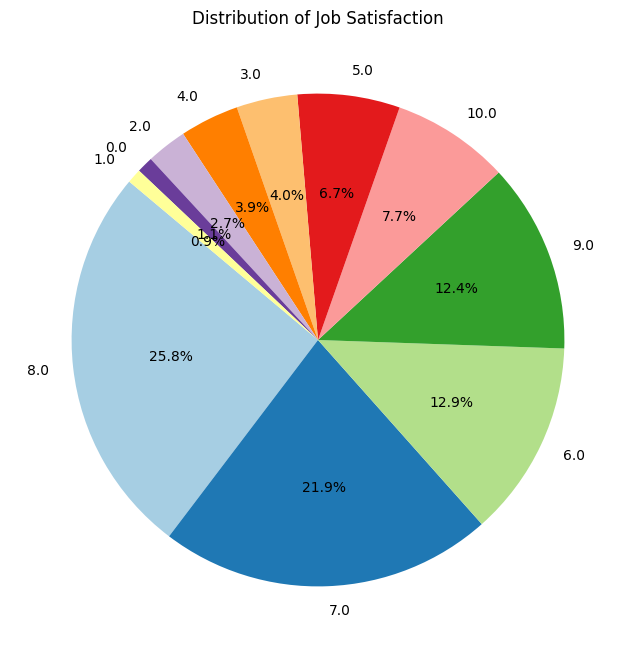

/tmp/ipykernel_919/4008388502.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['JobSat'].dropna(), shade=True, color='skyblue')


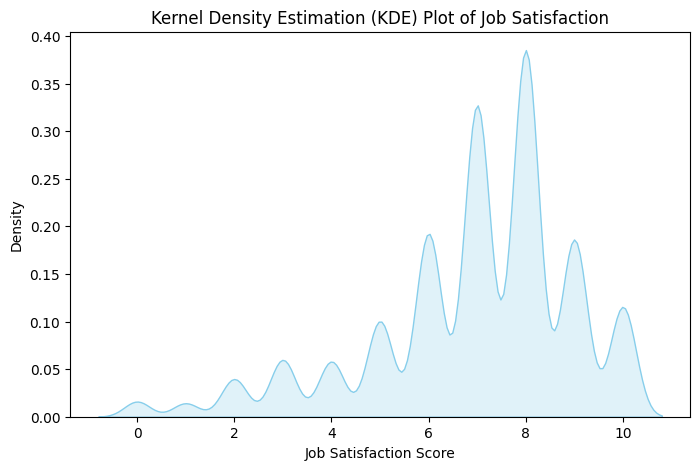

In [7]:
# JobSat の値の分布を取得
job_sat_counts = df['JobSat'].value_counts()

# 円グラフの作成
plt.figure(figsize=(8, 8))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# タイトルの設定
plt.title('Distribution of Job Satisfaction')

# グラフの表示
plt.show()

# KDEプロットの作成（JobSatの分布を可視化）
plt.figure(figsize=(8, 5))
sns.kdeplot(df['JobSat'].dropna(), shade=True, color='skyblue')

# ラベル設定
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of Job Satisfaction')

# グラフの表示
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1200x600 with 0 Axes>

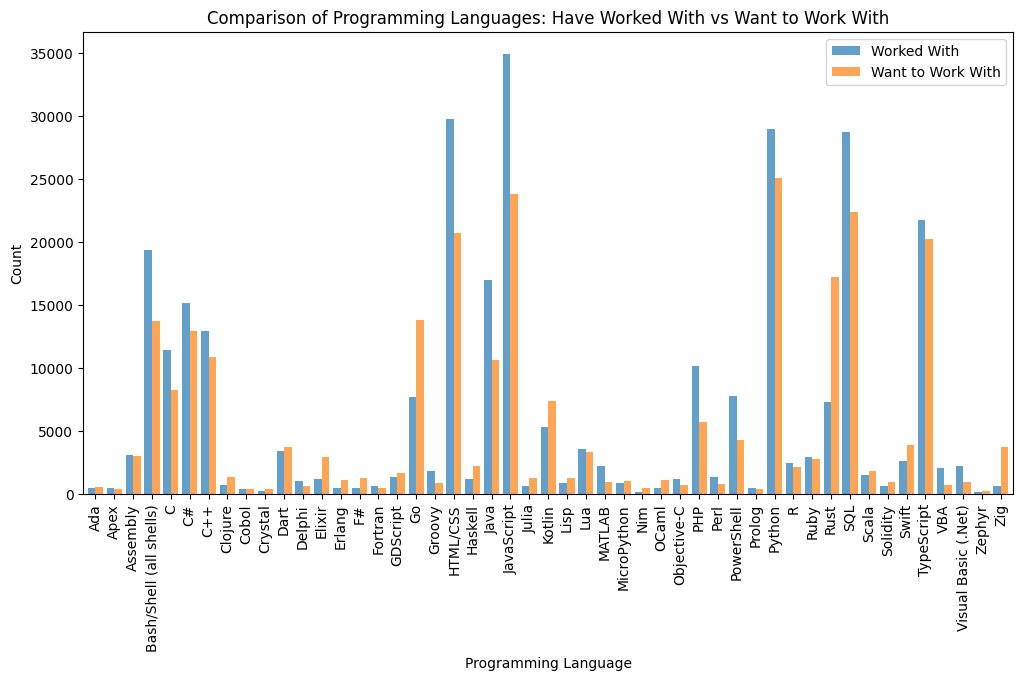

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 言語データの抽出（必要な列を選択し、欠損値を削除）
df_languages = df[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].dropna()

# 言語リストを展開（";" 区切りのデータをリスト化し、個別の行にする）
worked_counts = df_languages['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()
wanted_counts = df_languages['LanguageWantToWorkWith'].str.split(';').explode().value_counts()

# データフレーム化して結合
language_comparison = pd.DataFrame({'Worked With': worked_counts, 'Want to Work With': wanted_counts}).fillna(0)

# グループ化された棒グラフの作成
plt.figure(figsize=(12, 6))
language_comparison.plot(kind='bar', figsize=(12, 6), width=0.8, alpha=0.7)

# ラベル設定
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Comparison of Programming Languages: Have Worked With vs Want to Work With')
plt.xticks(rotation=90)

# グラフの表示
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1200x600 with 0 Axes>

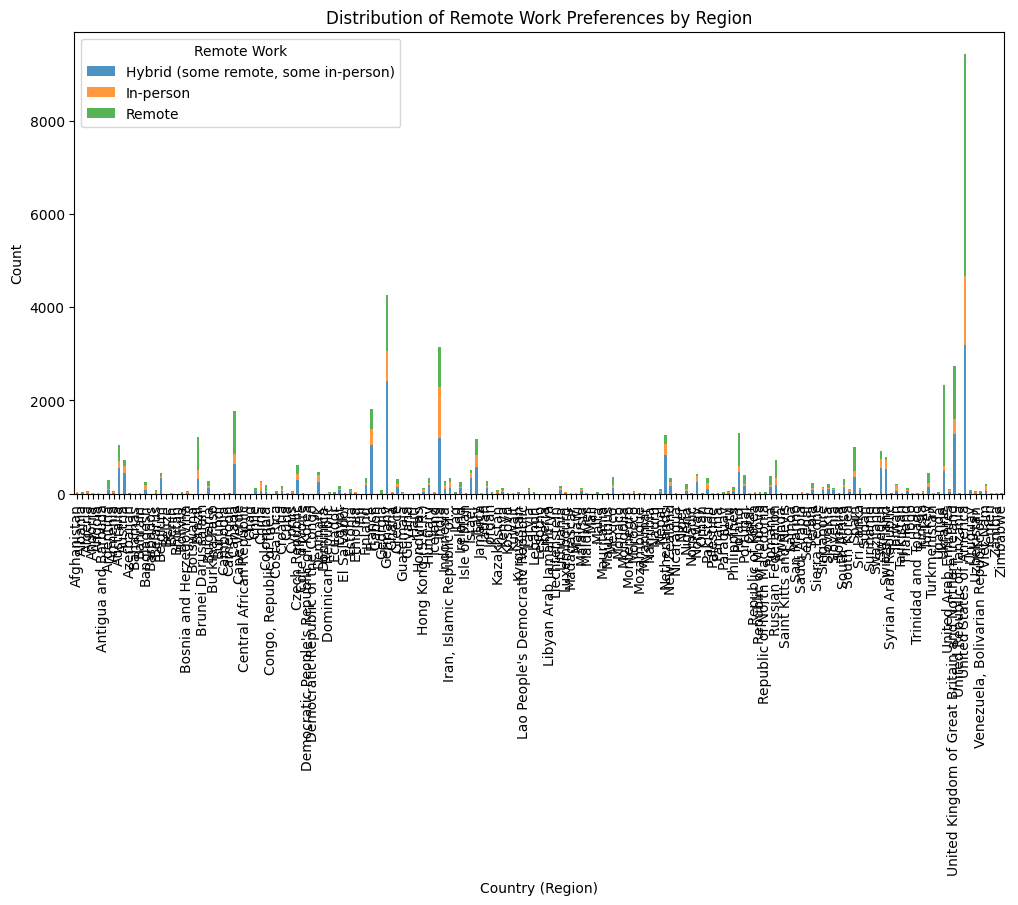

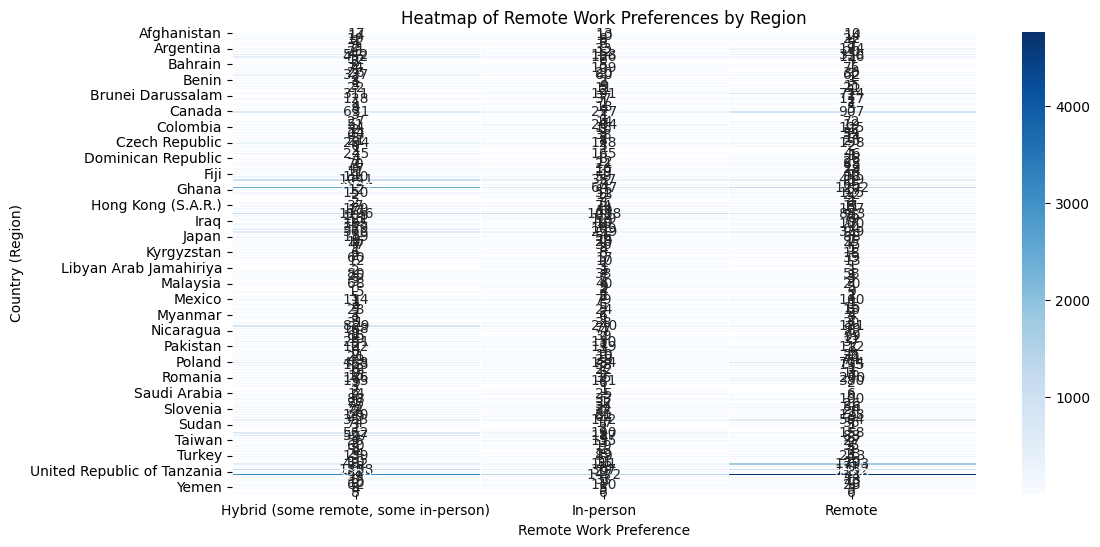

In [11]:
# 必要なデータの抽出（RemoteWorkとCountry）
df_remote_region = df[['Country', 'RemoteWork']].dropna()

# RemoteWork の集計
remote_work_counts = df_remote_region.groupby(['Country', 'RemoteWork']).size().unstack()

# グループ化された棒グラフの作成
plt.figure(figsize=(12, 6))
remote_work_counts.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8)

# ラベル設定
plt.xlabel('Country (Region)')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Preferences by Region')
plt.xticks(rotation=90)
plt.legend(title='Remote Work')

# グラフの表示
plt.show()

# ヒートマップの作成
plt.figure(figsize=(12, 6))
sns.heatmap(remote_work_counts, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)

# ラベル設定
plt.xlabel('Remote Work Preference')
plt.ylabel('Country (Region)')
plt.title('Heatmap of Remote Work Preferences by Region')

# グラフの表示
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [13]:
# 必要なデータの抽出と欠損値の削除
df_correlation = df[['JobSat', 'YearsCodePro']].dropna()

# 数値型に変換（YearsCodeProが文字列の可能性があるため）
df_correlation = df_correlation[pd.to_numeric(df_correlation['YearsCodePro'], errors='coerce').notna()]
df_correlation['YearsCodePro'] = df_correlation['YearsCodePro'].astype(float)

# ピアソン相関係数の計算
pearson_corr = df_correlation.corr(method='pearson')

# スピアマン相関係数の計算
spearman_corr = df_correlation.corr(method='spearman')

# 結果の表示
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
                JobSat  YearsCodePro
JobSat        1.000000      0.103365
YearsCodePro  0.103365      1.000000

Spearman Correlation Matrix:
                JobSat  YearsCodePro
JobSat        1.000000      0.120685
YearsCodePro  0.120685      1.000000


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Cross-tabulation of Education Level and Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
As

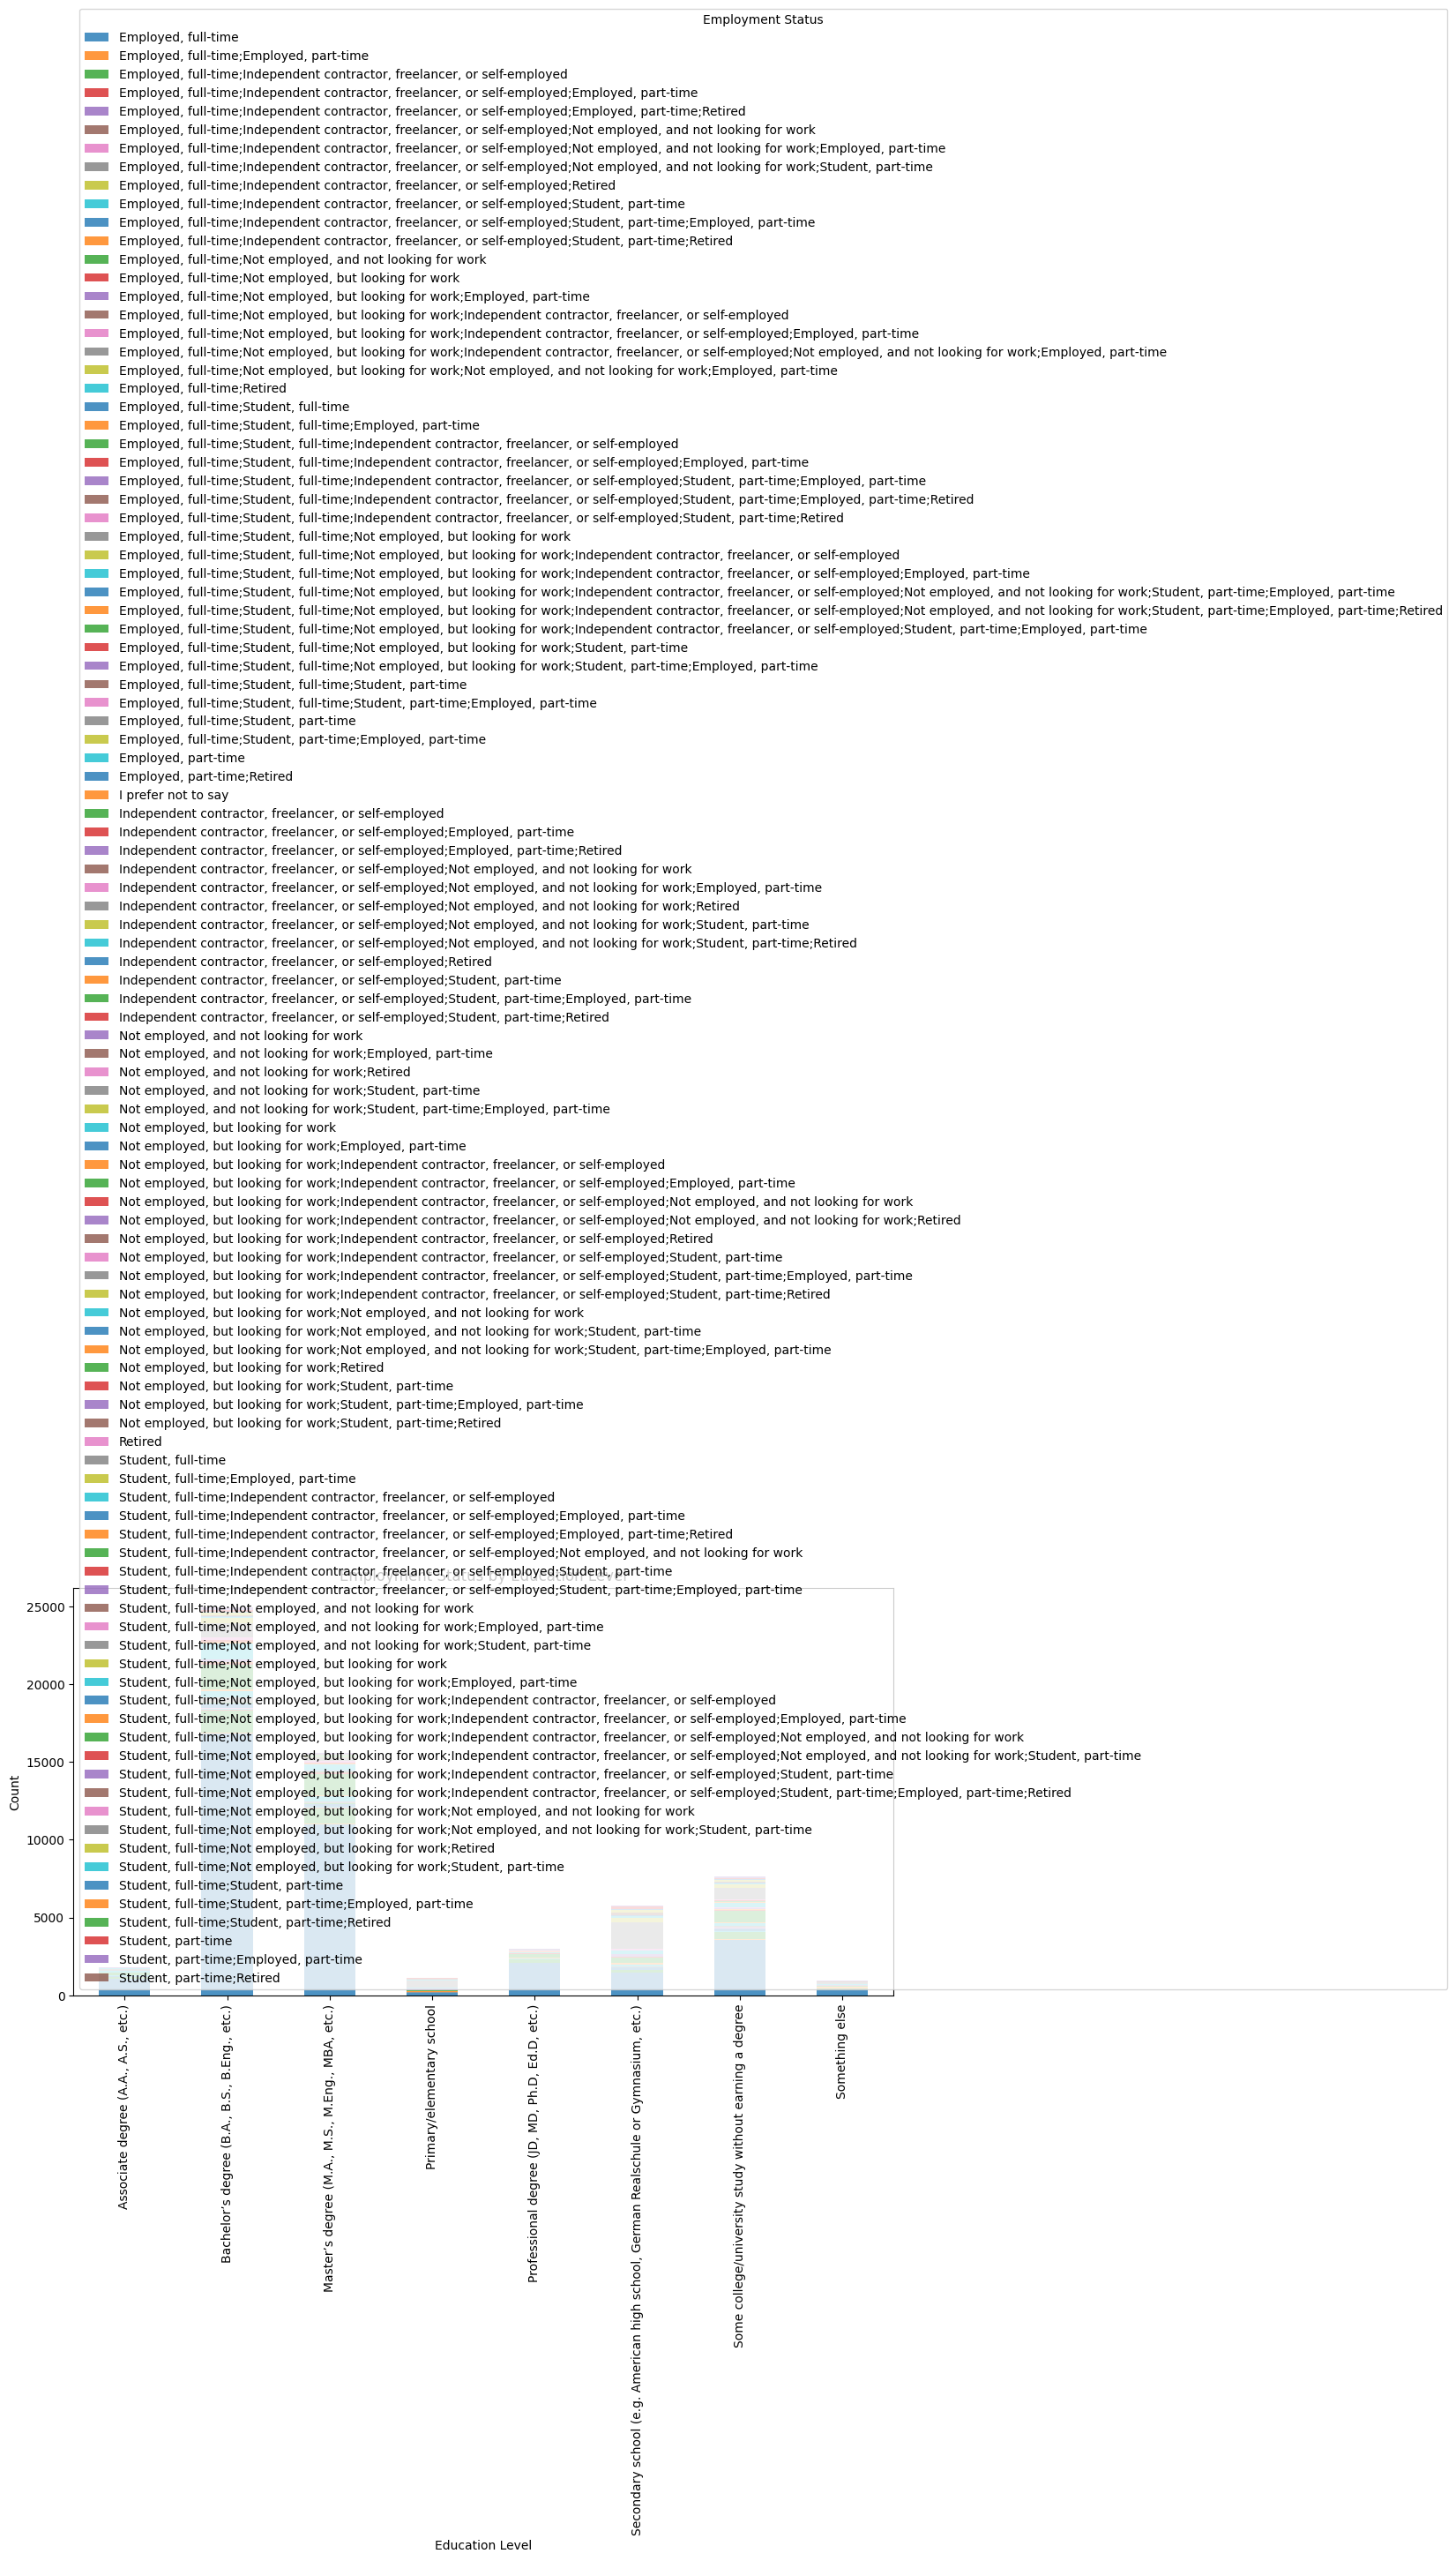

In [14]:
# 必要なデータの抽出と欠損値の削除
df_education_employment = df[['Employment', 'EdLevel']].dropna()

# 教育レベルと雇用形態のクロス集計
education_employment_crosstab = pd.crosstab(df_education_employment['EdLevel'], df_education_employment['Employment'])

# クロス集計表の表示
print("Cross-tabulation of Education Level and Employment Type:")
print(education_employment_crosstab)

# スタックドバー（積み上げ棒グラフ）の作成
education_employment_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8)

# ラベル設定
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Employment Status by Education Level')
plt.xticks(rotation=90)
plt.legend(title='Employment Status')

# グラフの表示
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
